# Attempting to replicate the toy 3D diagram for real

In [21]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
path = '../../dgym-data'

deck = dg.MoleculeCollection.load(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

building_blocks = dg.datasets.disk_loader(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630_atoms.fpb')

import torch
import pyarrow.parquet as pq
table = pq.read_table('../../dgym-data/sizes.parquet')[0]
sizes = torch.tensor(table.to_numpy())

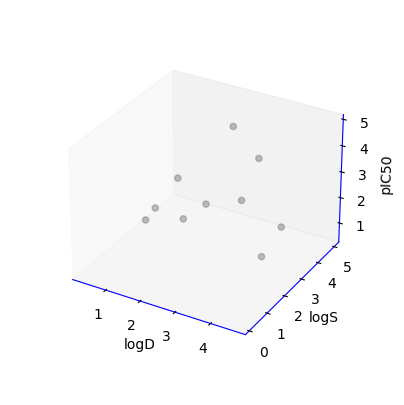

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Set up the figure and 3D axis
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Example data
logD = np.random.uniform(0, 5, 10)
logS = np.random.uniform(0, 5, 10)
pIC50 = np.random.uniform(0, 5, 10)

# Scatter plot for initial hits
ax.scatter3D(logD, logS, pIC50, c='grey', alpha=0.5)

# Set axes to blue
ax.xaxis.line.set_color('blue')
ax.yaxis.line.set_color('blue')
ax.zaxis.line.set_color('blue')

# Set labels
ax.set_xlabel('logD')
ax.set_ylabel('logS')
ax.set_zlabel('pIC50')

ax.grid(False)
ax.set_box_aspect(aspect=None, zoom=0.8)

# Show plot
plt.show()